What's Matplotlib?

- A python plotting library

- Built on NumPy arrays
- Integrates directly with pandas
- Can create basic and advanced plots
- Simple to use interface


In [1]:
# To show the plot inline with Jupyter notebook output, use below magic function
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Two ways of plotting using matplotlib

## pyplot based plotting (less flexible)

[]

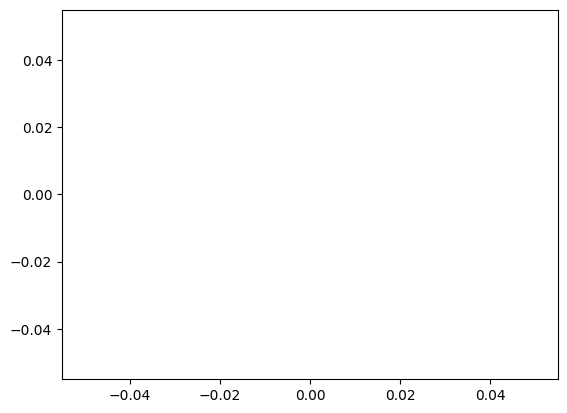

In [2]:
plt.plot()

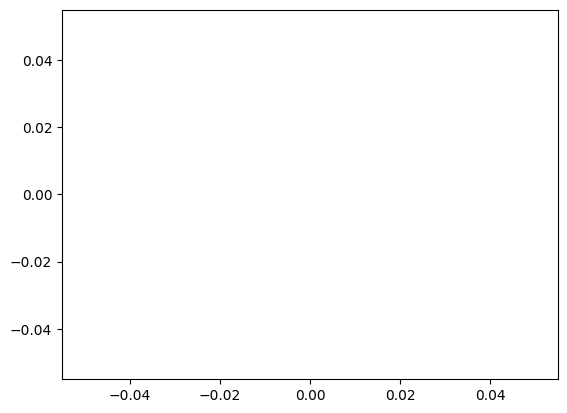

In [3]:
plt.plot(); # semi-colon at the end avoids the empty [] output as above

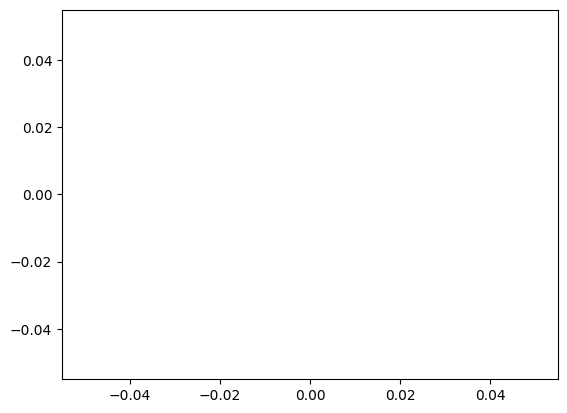

In [4]:
plt.plot()
plt.show()

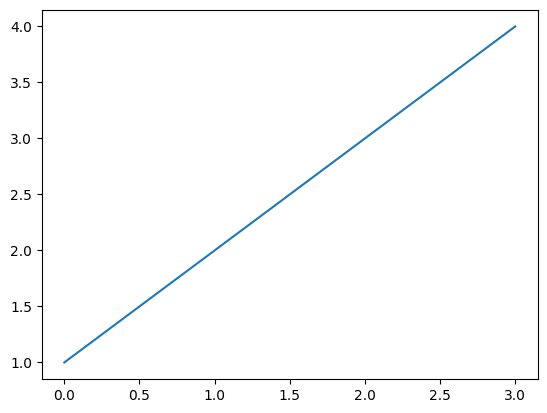

In [6]:
plt.plot([1,2,3,4]);

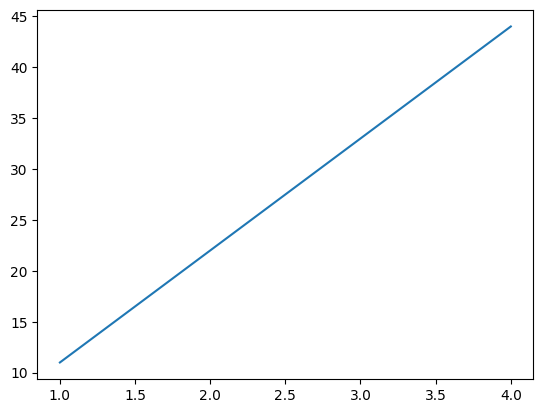

In [7]:
x = [1,2,3,4]
y = [11,22,33,44]
plt.plot(x,y)

## Object-oriented API based plotting (more flexible)

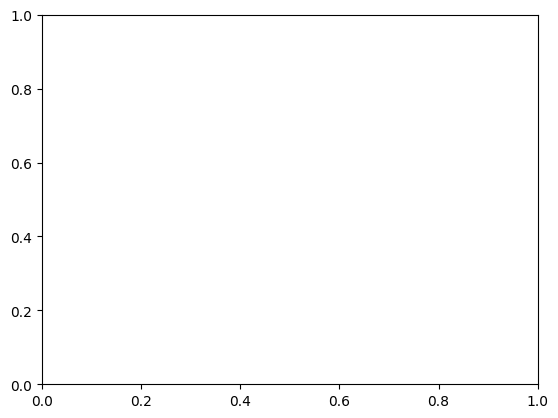

In [10]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

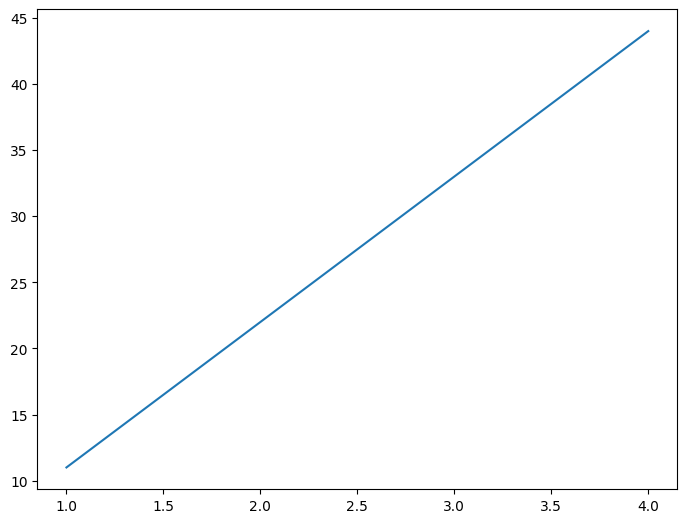

In [13]:
# 2nd method
fig = plt.figure() # creates a figure
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y);

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

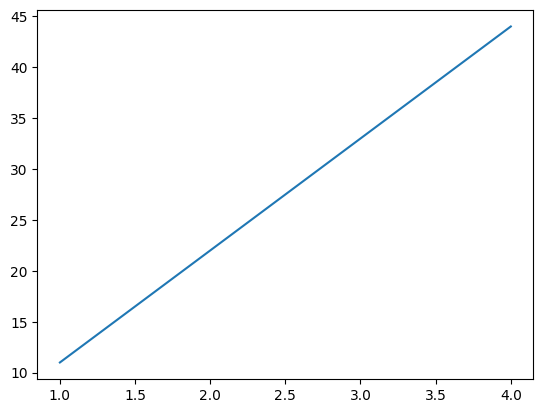

In [15]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x,y);
type(fig), type(ax)

# Matplotlib Example Workflow

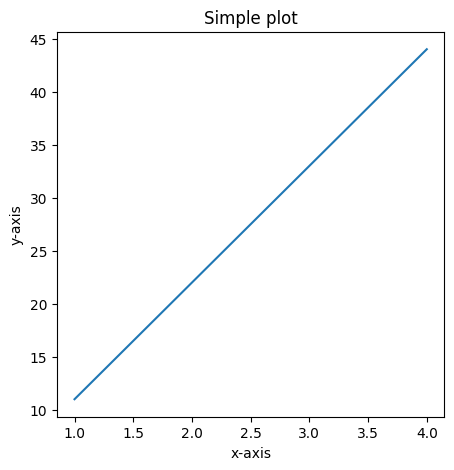

In [17]:
# 0. import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(5,5)) # (width, height)

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Simple plot",
       xlabel="x-axis",
       ylabel="y-axis")

# 5. Save and show (you save the whole figure)
fig.savefig("images/sample-plot.png")



# Making figures with NumPy arrays

In [18]:
import numpy as np

In [19]:
# create data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

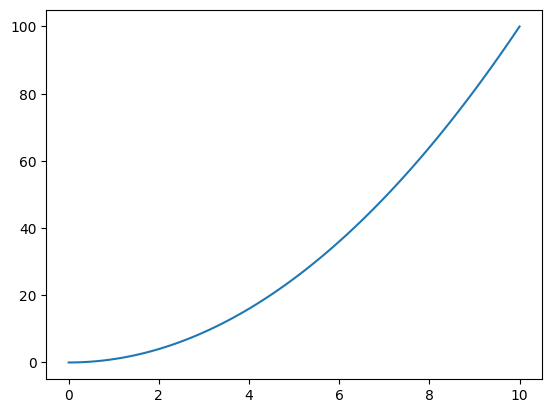

In [20]:
# plot the data and create a line plot (default)
fig, ax = plt.subplots()
ax.plot(x, x**2);

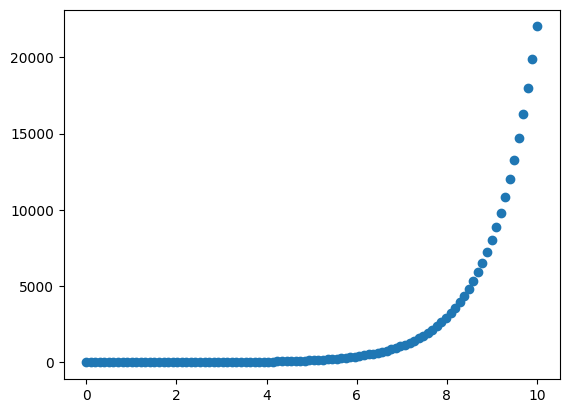

In [21]:
# Use same data to make scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

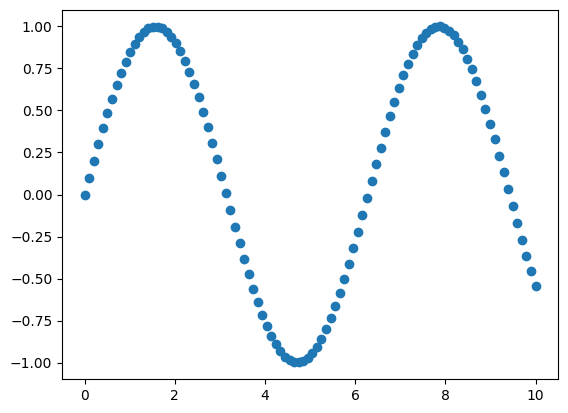

In [22]:
# another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

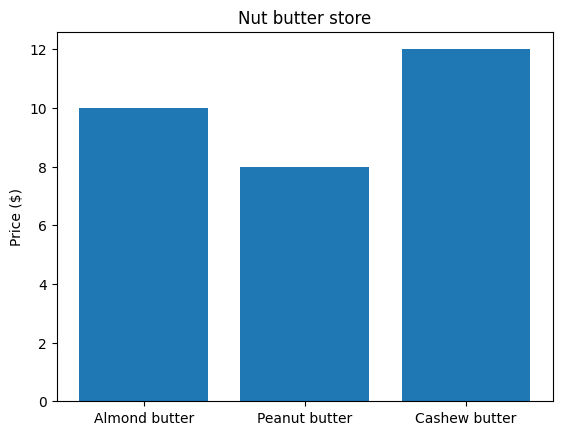

In [2]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig,ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Nut butter store", ylabel="Price ($)");

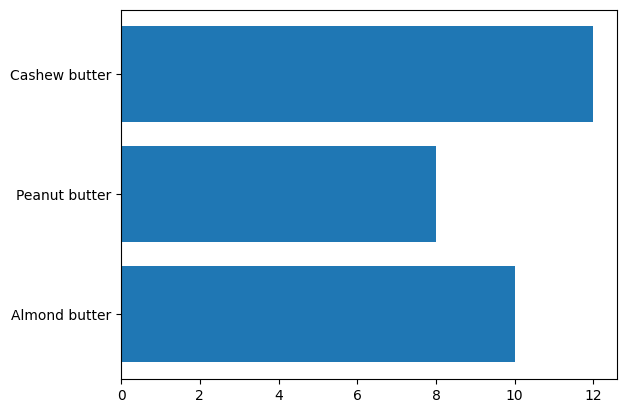

In [5]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()),list(nut_butter_prices.values()));

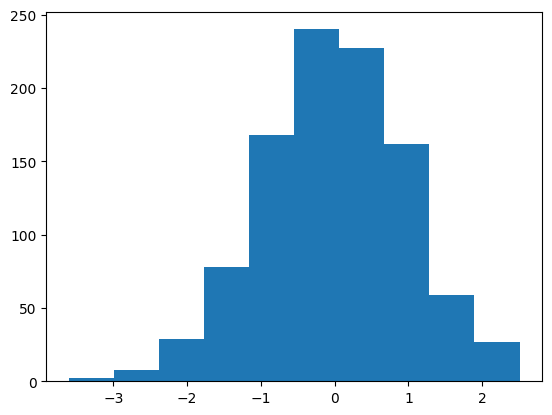

In [6]:
# Histogram

# Make some data
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

## Two options for subplots

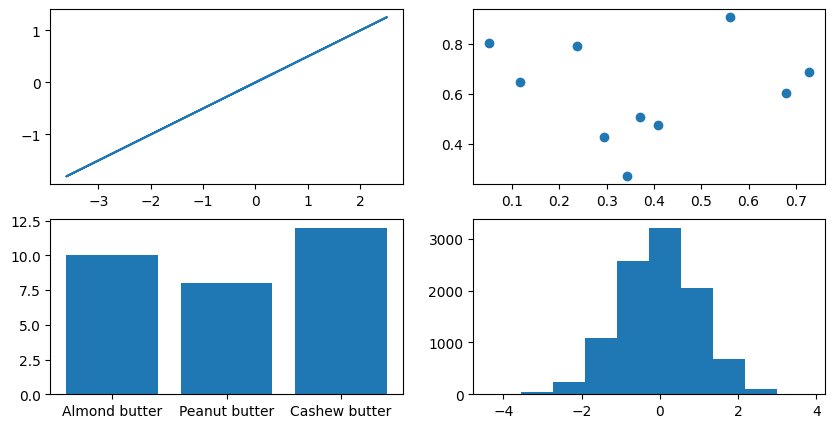

In [11]:
# subplot option 1
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2,
                                           ncols=2,
                                           figsize=(10,5))
ax1.plot(x,x/2);
ax2.scatter(np.random.random(10),np.random.random(10));
ax3.bar(nut_butter_prices.keys(),nut_butter_prices.values());
ax4.hist(np.random.randn(10000));

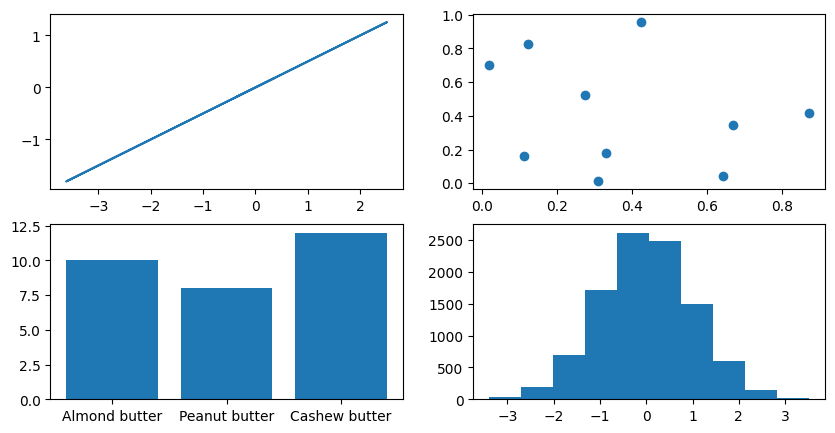

In [16]:
# Subplots Option 2
fig, ax = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10,5))
# Plot to each different index of axis
ax[0,0].plot(x,x/2);
ax[0,1].scatter(np.random.random(10),np.random.random(10));
ax[1,0].bar(nut_butter_prices.keys(),nut_butter_prices.values());
ax[1,1].hist(np.random.randn(10000));

# Plotting from pandas dataframe

https://pandas.pydata.org/docs/user_guide/visualization.html

In [17]:
import pandas as pd

In [5]:
# Make a dataframe
car_sales = pd.read_csv("data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [23]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2023", periods=1000))

ts

2023-01-01   -1.022224
2023-01-02   -0.697194
2023-01-03   -0.009972
2023-01-04   -0.517802
2023-01-05   -1.037987
                ...   
2025-09-22   -1.095088
2025-09-23   -1.716932
2025-09-24    1.238402
2025-09-25    1.098098
2025-09-26   -0.250885
Freq: D, Length: 1000, dtype: float64

<Axes: >

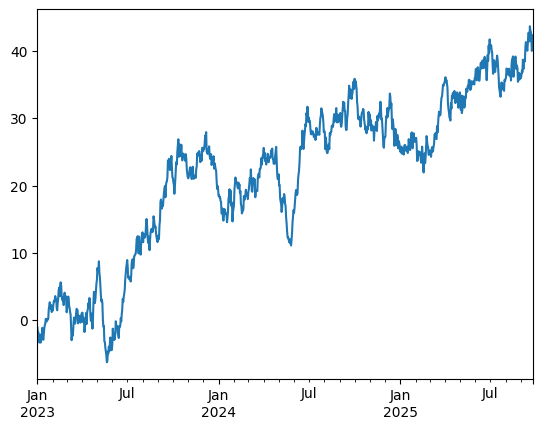

In [24]:
ts = ts.cumsum()

ts.plot()

In [6]:
car_sales["Price"] = car_sales["Price"].str.replace("[\$\,]","",regex=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.00
1,Honda,Red,87899,4,5000.00
2,Toyota,Blue,32549,3,7000.00
3,BMW,Black,11179,5,22000.00
4,Nissan,White,213095,4,3500.00
5,Toyota,Green,99213,4,4500.00
6,Honda,Blue,45698,4,7500.00
7,Honda,Blue,54738,4,7000.00
8,Toyota,White,60000,4,6250.00
9,Nissan,White,31600,4,9700.00


In [7]:
car_sales["Price"] = car_sales["Price"].str[:-3]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [8]:
car_sales["Sale Date"] = pd.date_range("1/1/2023",periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2023-01-01
1,Honda,Red,87899,4,5000,2023-01-02
2,Toyota,Blue,32549,3,7000,2023-01-03
3,BMW,Black,11179,5,22000,2023-01-04
4,Nissan,White,213095,4,3500,2023-01-05
5,Toyota,Green,99213,4,4500,2023-01-06
6,Honda,Blue,45698,4,7500,2023-01-07
7,Honda,Blue,54738,4,7000,2023-01-08
8,Toyota,White,60000,4,6250,2023-01-09
9,Nissan,White,31600,4,9700,2023-01-10


In [10]:
car_sales["Total Sales"] = car_sales["Price"].cumsum() # doesn't work since Price column is still string
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2023-01-01,4000
1,Honda,Red,87899,4,5000,2023-01-02,40005000
2,Toyota,Blue,32549,3,7000,2023-01-03,400050007000
3,BMW,Black,11179,5,22000,2023-01-04,40005000700022000
4,Nissan,White,213095,4,3500,2023-01-05,400050007000220003500
5,Toyota,Green,99213,4,4500,2023-01-06,4000500070002200035004500
6,Honda,Blue,45698,4,7500,2023-01-07,40005000700022000350045007500
7,Honda,Blue,54738,4,7000,2023-01-08,400050007000220003500450075007000
8,Toyota,White,60000,4,6250,2023-01-09,4000500070002200035004500750070006250
9,Nissan,White,31600,4,9700,2023-01-10,40005000700022000350045007500700062509700


In [11]:
type(car_sales["Price"][0])

str

In [12]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum() # convert price column to integer before taking cumsum
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2023-01-01,4000
1,Honda,Red,87899,4,5000,2023-01-02,9000
2,Toyota,Blue,32549,3,7000,2023-01-03,16000
3,BMW,Black,11179,5,22000,2023-01-04,38000
4,Nissan,White,213095,4,3500,2023-01-05,41500
5,Toyota,Green,99213,4,4500,2023-01-06,46000
6,Honda,Blue,45698,4,7500,2023-01-07,53500
7,Honda,Blue,54738,4,7000,2023-01-08,60500
8,Toyota,White,60000,4,6250,2023-01-09,66750
9,Nissan,White,31600,4,9700,2023-01-10,76450


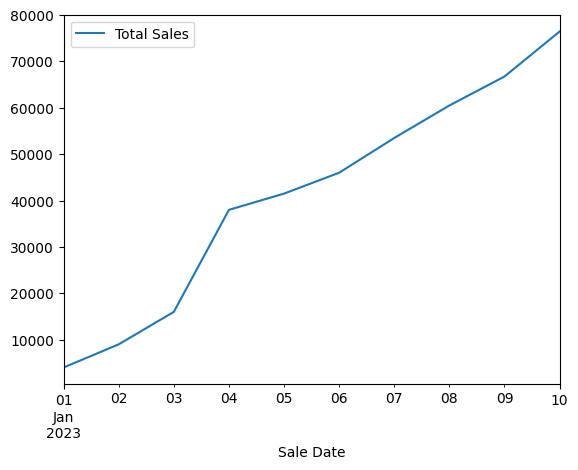

In [14]:
# Let's plot the total sales
car_sales.plot(x="Sale Date", y="Total Sales");

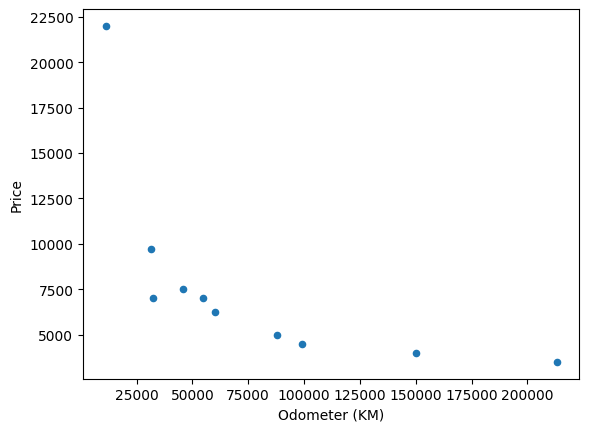

In [16]:
# Let's make scatter plot
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales.plot(x = "Odometer (KM)", y = "Price", kind="scatter");

In [17]:
# Let's plot a bar graph

# create data
x = np.random.random((10,4))
x

df = pd.DataFrame(x,columns=['a','b','c','d'])
df

,a,b,c,d
0,0.975585,0.089006,0.131992,0.782251
1,0.676765,0.173127,0.031269,0.127658
2,0.810134,0.903037,0.996052,0.918006
3,0.634762,0.002187,0.385225,0.608121
4,0.995328,0.130156,0.776050,0.692803
5,0.056960,0.460595,0.477298,0.986070
6,0.335693,0.156826,0.886975,0.116365
7,0.893985,0.469396,0.949345,0.989898
8,0.492233,0.508862,0.495710,0.129911
9,0.173345,0.083950,0.832563,0.142306


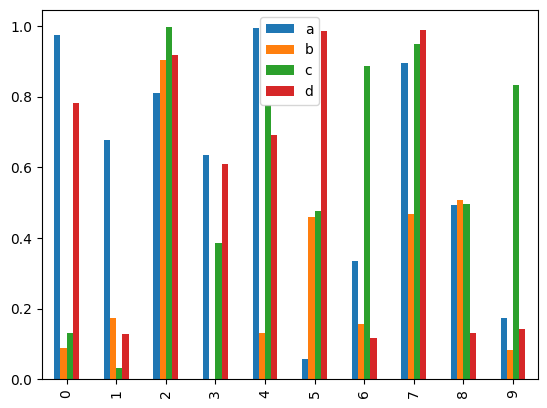

In [20]:
df.plot.bar();

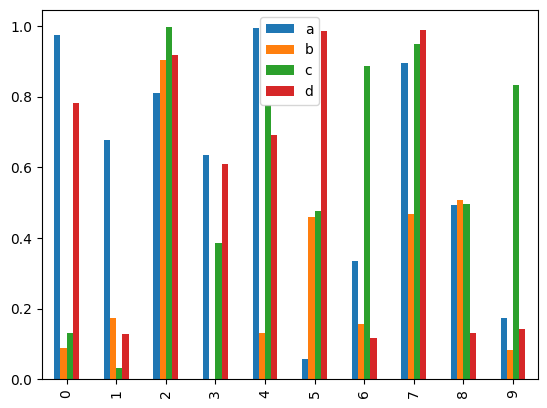

In [22]:
# another way
df.plot(kind="bar");

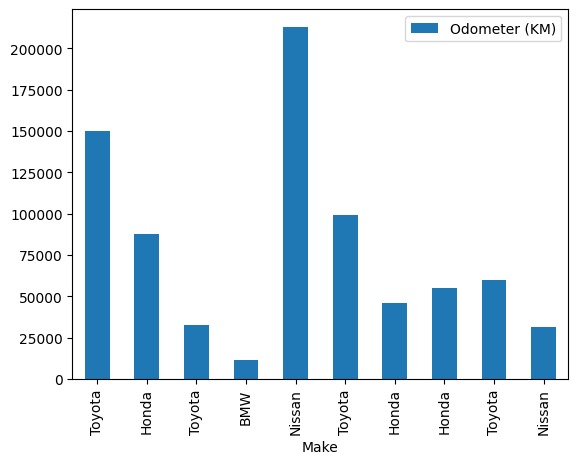

In [23]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

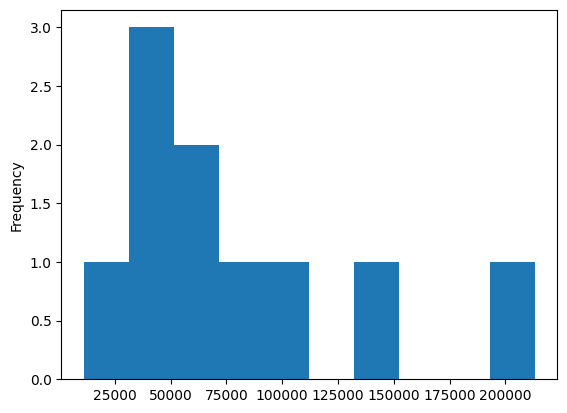

In [24]:
# How about histograms?

car_sales["Odometer (KM)"].plot.hist();

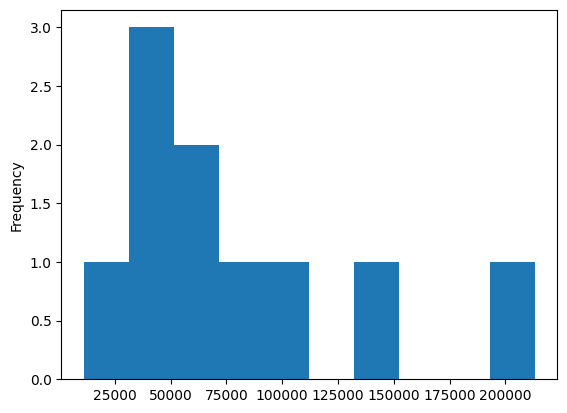

In [25]:
car_sales["Odometer (KM)"].plot(kind='hist');

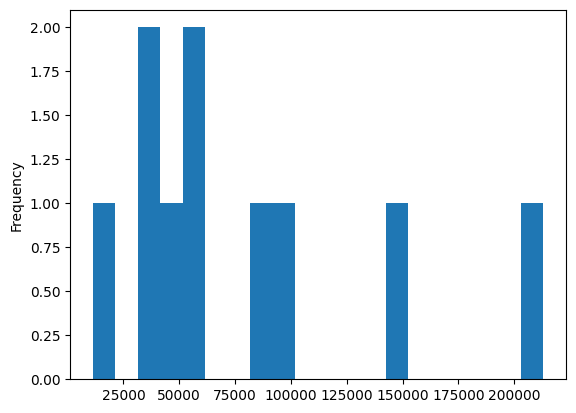

In [26]:
car_sales["Odometer (KM)"].plot.hist(bins=20); #Explore number of bins so that you can get a histogram looking like a pdf.
# In this case, default value of bins = 10 looks better

In [27]:
# Let's try on another dataset
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


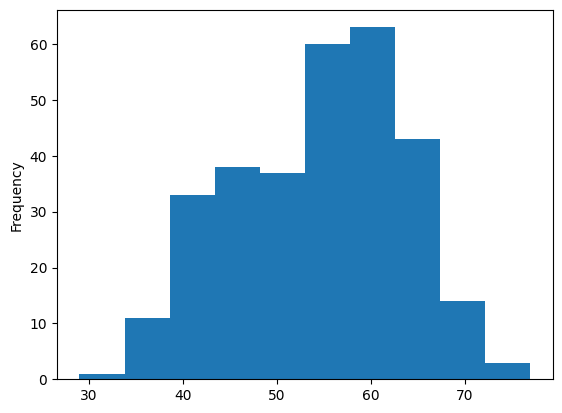

In [28]:
heart_disease["age"].plot.hist();

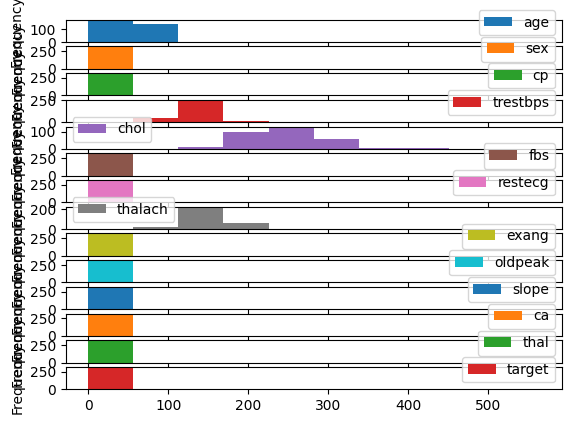

In [29]:
heart_disease.plot.hist(subplots=True);

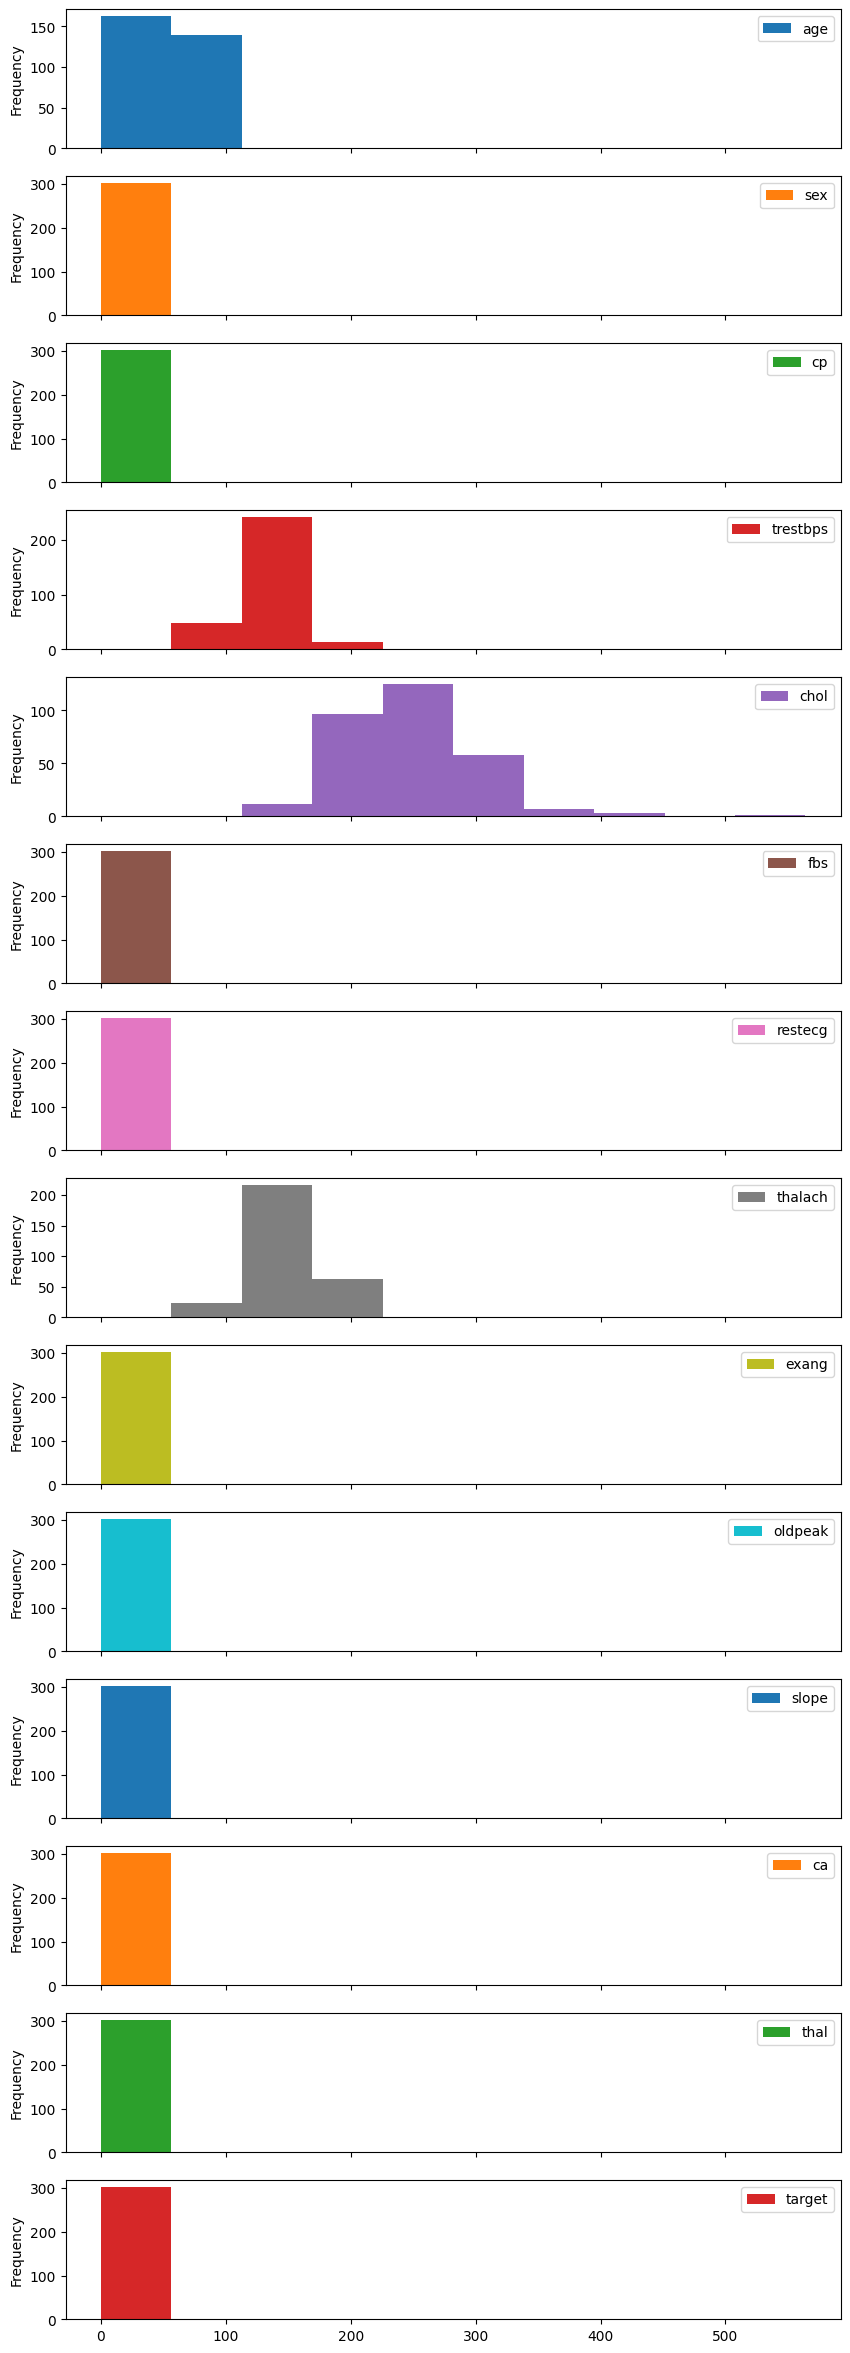

In [30]:
# That looks very crammed
heart_disease.plot.hist(subplots=True, figsize=(10,30));

In [ ]:
# Still doesn't look very useful because it's using the same x axis for all columns
# So, most of the columns end up with just 1 bin

# This can be solved by using Object-Oriented (OO) API rather than using pyplot as above

## Which one should you use: pyplot vs OO (Object-oriented)

* When plotting something quickly, okay to use the pyplot method
* When plotting something more advanced, use the OO method

In [31]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


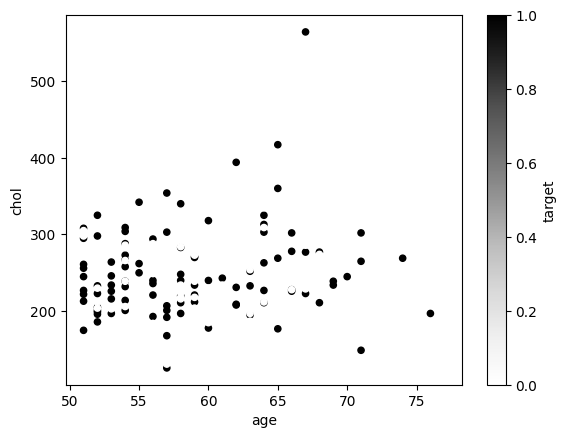

In [33]:
# PyPlot method
over_50.plot(kind="scatter",
             x="age",
             y="chol",
             c="target");

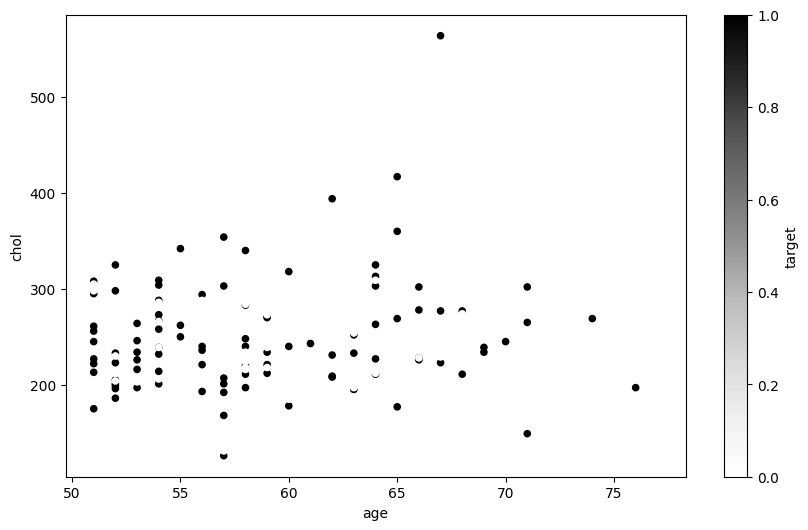

In [37]:
# OO method mixed with Pyplot method
fig, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind="scatter",
             x="age",
             y="chol",
             c="target",
             ax=ax);
#ax.set_xlim([45, 100]);

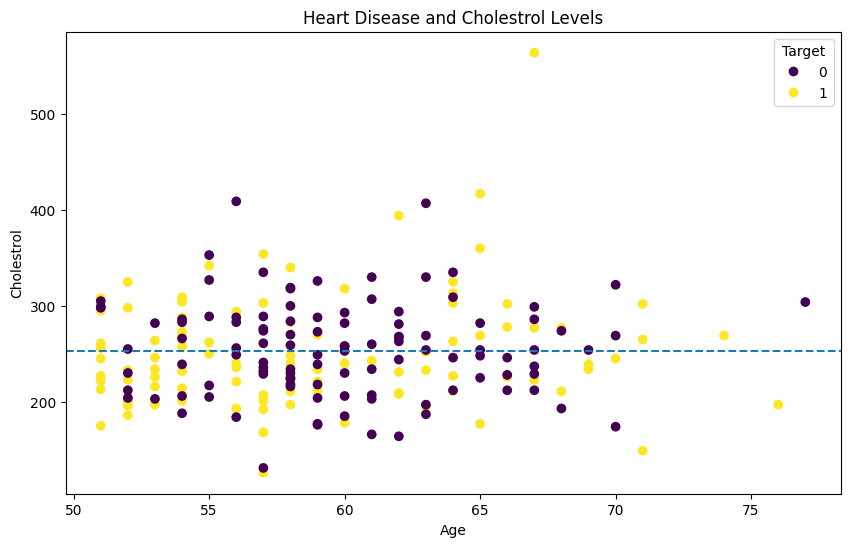

In [46]:
# OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholestrol Levels",
       xlabel="Age",
       ylabel="Cholestrol");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
           linestyle="--");

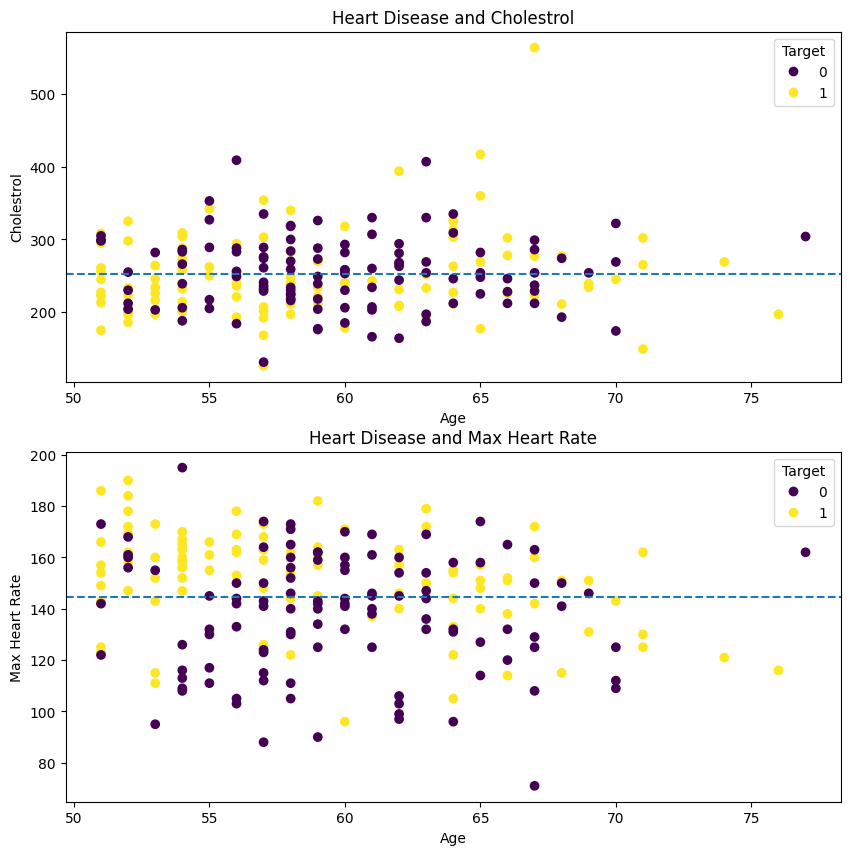

In [52]:
# Subplot of chol, age, thalach
fig, (ax0,ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10,10))

# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"])

# Customize ax0
ax0.set(title="Heart Disease and Cholestrol",
        xlabel="Age",
        ylabel="Cholestrol")

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a mean line
ax0.axhline(over_50["chol"].mean(),
            linestyle="--");

# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                      y=over_50["thalach"],
                      c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a mean line
ax1.axhline(over_50["thalach"].mean(),
            linestyle="--");

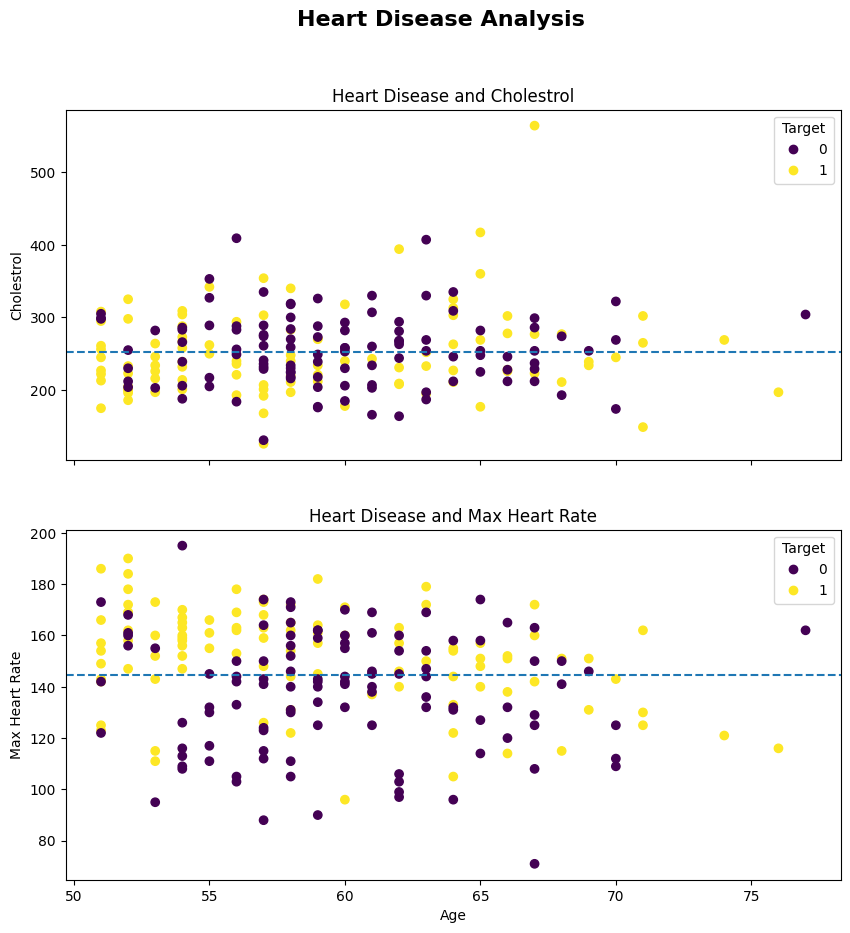

In [55]:
# Both subplots have the same axis above. So, we can tell it to share the x axis using sharex parameter and remove the xlabel from ax0

# Subplot of chol, age, thalach
fig, (ax0,ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10,10),
                              sharex=True)

# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"])

# Customize ax0
ax0.set(title="Heart Disease and Cholestrol",
        #xlabel="Age",
        ylabel="Cholestrol")

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a mean line
ax0.axhline(over_50["chol"].mean(),
            linestyle="--");

# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                      y=over_50["thalach"],
                      c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a mean line
ax1.axhline(over_50["thalach"].mean(),
            linestyle="--");

# Add a title to whole figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");



# Customizing Matplotlib plots

In [56]:
# See the different styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<Axes: >

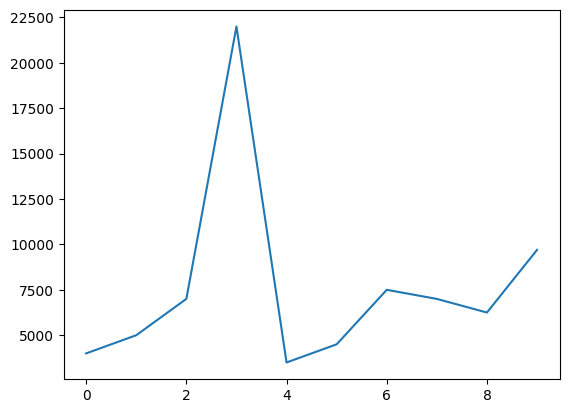

In [57]:
# default style
car_sales["Price"].plot()

In [58]:
plt.style.use('seaborn-v0_8-whitegrid')

<Axes: >

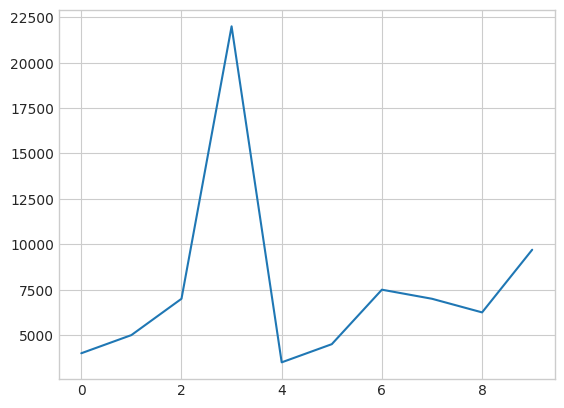

In [59]:
car_sales["Price"].plot()

In [60]:
plt.style.use('seaborn-v0_8')

<Axes: >

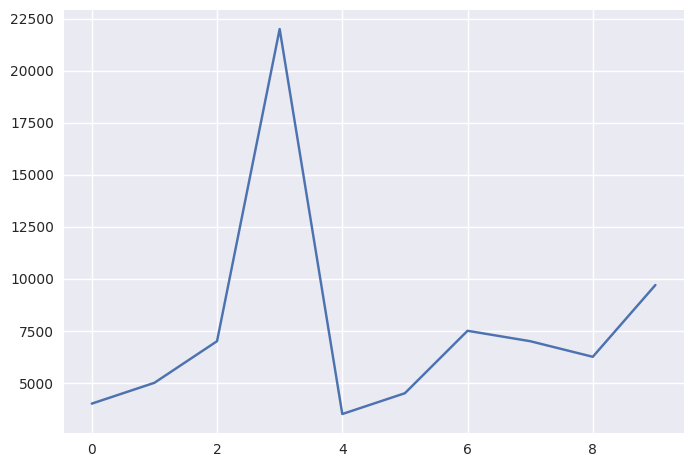

In [61]:
car_sales["Price"].plot()

In [62]:
plt.style.use('ggplot')

<Axes: >

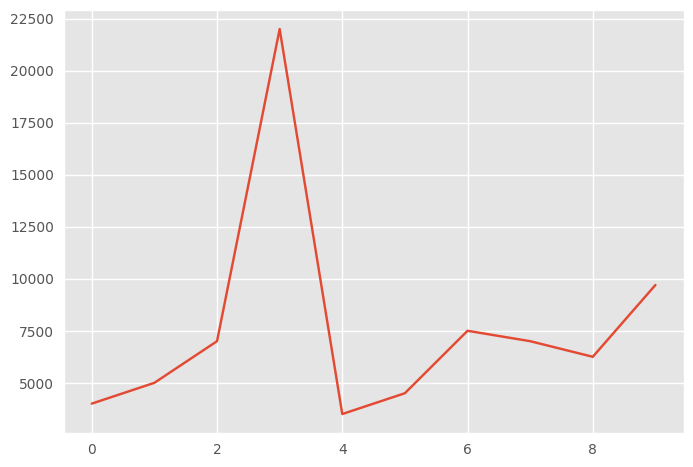

In [63]:
car_sales["Price"].plot()

In [64]:
# Create some data
x = np.random.randn(10,4)
x

array([[-0.68284383,  0.97642307, -0.49042212, -0.01951636],
       [-1.06010301, -0.37922814,  0.55327454,  1.29982765],
       [ 1.30215919,  0.26150669, -0.16292963, -2.57907565],
       [ 0.24327223, -2.70800179,  0.06365013,  0.71880229],
       [ 0.33286969, -1.73355347, -0.40166222,  1.651336  ],
       [ 0.69252261,  2.94170774, -0.87124103, -0.14821372],
       [ 1.74670769,  0.43647166, -0.74293332, -0.85425205],
       [-0.80418624, -0.96880332,  0.21672323,  0.75677572],
       [-0.0913858 ,  0.24469157,  1.36502865,  0.063337  ],
       [ 1.47493858, -0.85659117, -0.7226051 , -0.1599136 ]])

In [65]:
df = pd.DataFrame(x,columns=['a','b','c','d'])
df

,a,b,c,d
0,-0.682844,0.976423,-0.490422,-0.019516
1,-1.060103,-0.379228,0.553275,1.299828
2,1.302159,0.261507,-0.162930,-2.579076
3,0.243272,-2.708002,0.063650,0.718802
4,0.332870,-1.733553,-0.401662,1.651336
5,0.692523,2.941708,-0.871241,-0.148214
6,1.746708,0.436472,-0.742933,-0.854252
7,-0.804186,-0.968803,0.216723,0.756776
8,-0.091386,0.244692,1.365029,0.063337
9,1.474939,-0.856591,-0.722605,-0.159914


matplotlib.axes._axes.Axes

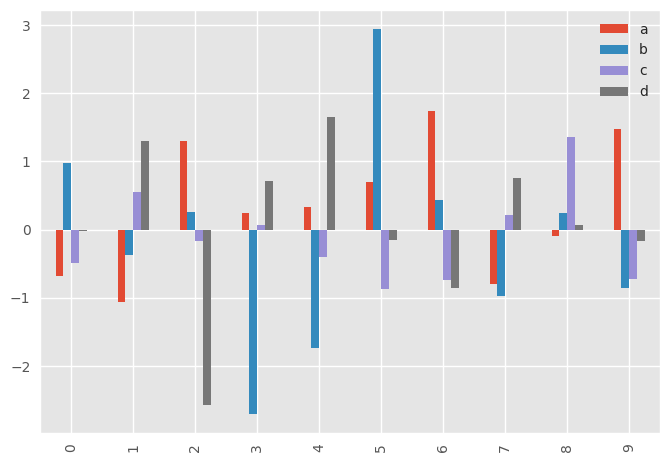

In [67]:
ax = df.plot(kind="bar");
type(ax)

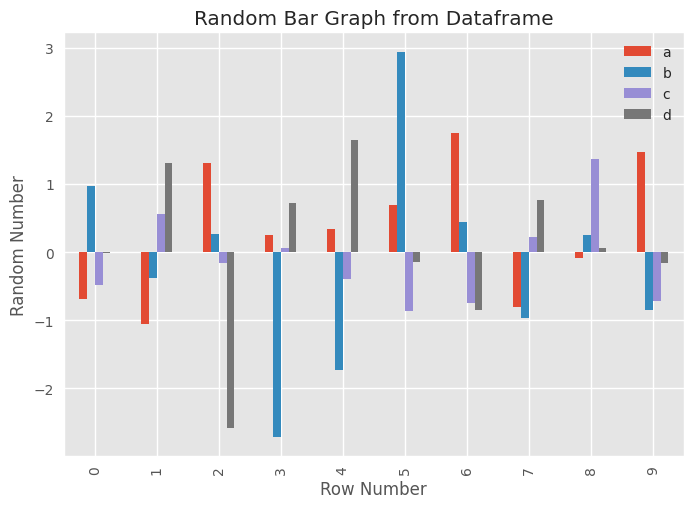

In [70]:
# Customize our plot with the set() method

ax = df.plot(kind="bar")

# Add some labels and title
ax.set(title="Random Bar Graph from Dataframe",
       xlabel="Row Number",
       ylabel="Random Number");

# Make legend visible
ax.legend().set_visible(True)

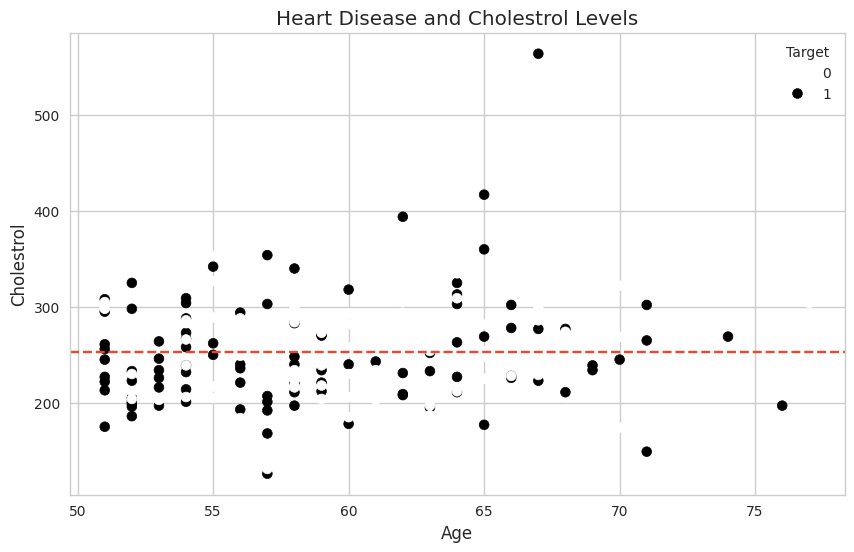

In [71]:
# Set the style
plt.style.use('seaborn-v0_8-whitegrid')

# OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholestrol Levels",
       xlabel="Age",
       ylabel="Cholestrol");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
           linestyle="--");

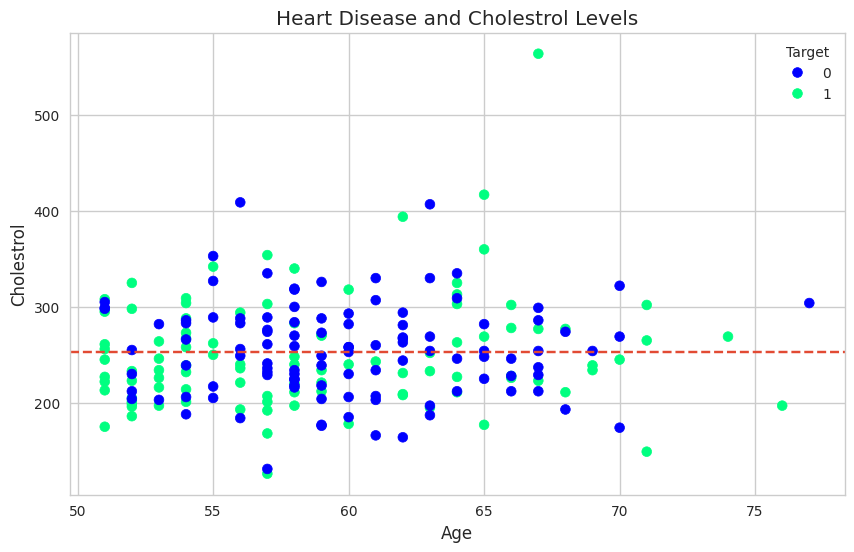

In [73]:
# Let's change the color scheme by adding different colormap using "cmap" param
# https://matplotlib.org/stable/users/explain/colors/colormaps.html

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')

# OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                     cmap="winter")

# Customize the plot
ax.set(title="Heart Disease and Cholestrol Levels",
       xlabel="Age",
       ylabel="Cholestrol");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
           linestyle="--");

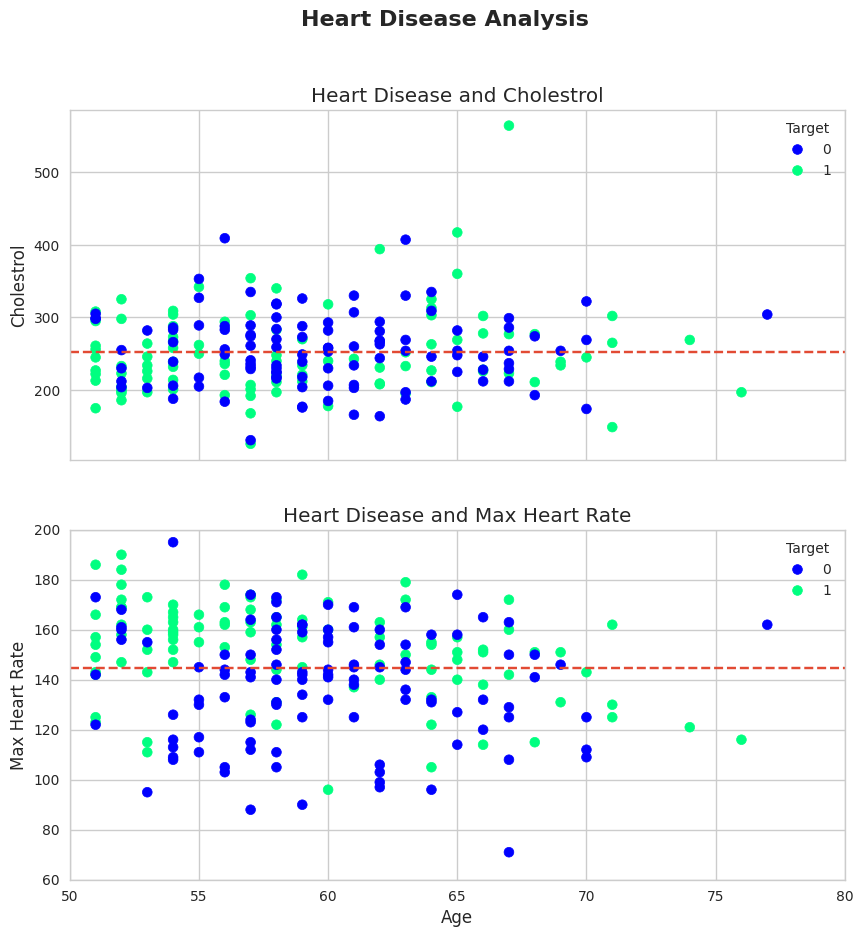

In [76]:
# Customizing the x and y axis limitations

# Both subplots have the same axis above. So, we can tell it to share the x axis using sharex parameter and remove the xlabel from ax0

# Subplot of chol, age, thalach
fig, (ax0,ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10,10),
                              sharex=True)

# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"],
                      cmap="winter")

# Customize ax0
ax0.set(title="Heart Disease and Cholestrol",
        #xlabel="Age",
        ylabel="Cholestrol")

ax0.set_xlim([50,80])

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a mean line
ax0.axhline(over_50["chol"].mean(),
            linestyle="--");

# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                      y=over_50["thalach"],
                      c=over_50["target"],
                      cmap="winter")
ax1.set_xlim([50,80])
ax1.set_ylim([60,200])

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a mean line
ax1.axhline(over_50["thalach"].mean(),
            linestyle="--");

# Add a title to whole figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");



In [77]:
# Saving and sharing plots

# you can right-click on the plot and use "Save Image as" to save it.

# You can also use code to save the plot
fig.savefig("images/hear-disease-matplotlib.png")

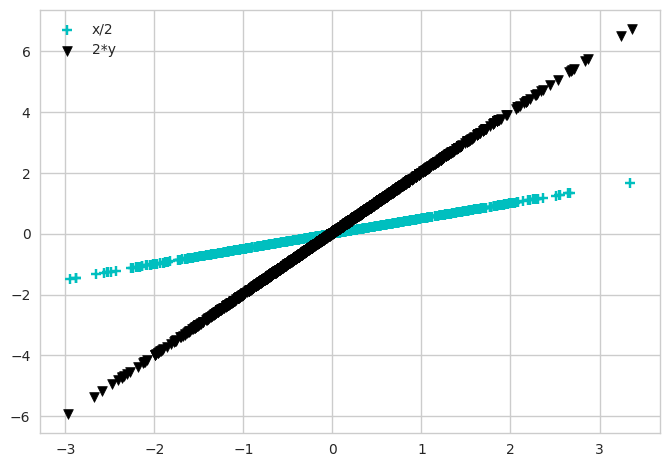

In [85]:
# Play with other parameters for formatting such as marker, color, labels etc
# https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D

x = np.random.randn(1000)
y = np.random.randn(1000)

fig,ax = plt.subplots()
ax.scatter(x, x/2, label="x/2", c='c', marker='+')
ax.scatter(y, 2*y, label="2*y", c='k', marker='v')

ax.legend().set_visible(True)